# Clustering Crypto

In [153]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [154]:
# Load the crypto_data.csv dataset.
path = Path('Resources/crypto_data.csv')
crypto_df = pd.read_csv(path, index_col=[0])
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [155]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df['IsTrading']]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [156]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns = ['IsTrading'])
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [157]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [158]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [159]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_name_df = crypto_df[['CoinName']]
print(coin_name_df.shape)
coin_name_df.head()

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [160]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns = ['CoinName'])
print(crypto_df.shape)
crypto_df.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [161]:
# Use get_dummies() to create variables for text features.
X_df = pd.get_dummies(crypto_df, columns = ['Algorithm', 'ProofType'])
print(X_df.shape)
X_df.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
X = scaler.fit_transform(X_df)
X

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [165]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components = 3, random_state = 1)
X_pca = pca.fit_transform(X)
X_pca
pca.explained_variance_ratio_.sum()

0.06976151849960527

In [166]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(X_pca, columns=['PC 1', 'PC 2', 'PC 3'], index=coin_name_df.index)
print(pcs_df.shape)
pcs_df.head(10)

(532, 3)


,PC 1,PC 2,PC 3
42,-0.334216,1.059431,-0.611129
404,-0.317579,1.060258,-0.611764
1337,2.299018,1.740704,-0.746129
BTC,-0.141841,-1.332626,0.202796
ETH,-0.149732,-1.990729,0.406060
LTC,-0.164912,-1.058848,-0.008733
DASH,-0.398149,1.182077,-0.499508
XMR,-0.155836,-2.253483,0.502534
ETC,-0.148178,-1.990762,0.406026
ZEC,-0.156200,-2.110309,0.399649


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [167]:
# Create an elbow curve to find the best value for K.
k = list(range(1,11))
inertia = [KMeans(n_clusters = ii, random_state = 1).fit(pcs_df).inertia_ for ii in k]
elbow_data = {'k':k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)

C:\Users\longs\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='k'>

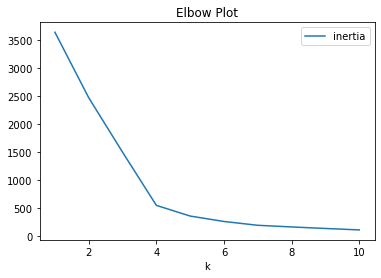

In [168]:
elbow_df.plot(x = 'k', y = 'inertia', title = 'Elbow Plot')

Running K-Means with `k=4`

In [169]:
# Initialize the K-Means model.
model = KMeans(n_clusters = 4, random_state = 1)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [171]:
clustered_df = crypto_df.merge(pcs_df, left_index = True, right_index = True)
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.334216,1.059431,-0.611129
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.317579,1.060258,-0.611764
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.299018,1.740704,-0.746129
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.141841,-1.332626,0.202796
ETH,Ethash,PoW,1.076842e+08,0,-0.149732,-1.990729,0.406060
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.164912,-1.058848,-0.008733
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.398149,1.182077,-0.499508
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.155836,-2.253483,0.502534
ETC,Ethash,PoW,1.133597e+08,210000000,-0.148178,-1.990762,0.406026
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.156200,-2.110309,0.399649


In [173]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.merge(pcs_df, left_index = True, right_index = True)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.merge(coin_name_df, left_index = True, right_index = True)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.334216,1.059431,-0.611129,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.317579,1.060258,-0.611764,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.299018,1.740704,-0.746129,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.141841,-1.332626,0.202796,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.149732,-1.990729,0.406060,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.164912,-1.058848,-0.008733,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.398149,1.182077,-0.499508,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.155836,-2.253483,0.502534,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.148178,-1.990762,0.406026,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.156200,-2.110309,0.399649,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [183]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x = 'PC 1',
    y = 'PC 2',
    z = 'PC 3',
    color = 'Class',
    symbol = 'Class',
    hover_name = 'CoinName',
    hover_data = ['Algorithm'],
    width = 800,
)
fig.update_layout(legend = dict(x = 0, y = 1))
fig.show()

In [180]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns = [
    'CoinName',
    'Algorithm',
    'ProofType',
    'TotalCoinSupply',
    'TotalCoinsMined',
    'Class']
)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [19]:
# Print the total number of tradable cryptocurrencies.
print(f'There are {clustered_df.shape[0]} tradeable cryptocurrencies.')

There are 532 tradable cryptocurrencies.


In [198]:
supply_df = supply_df.merge(coin_name_df, left_index = True, right_index = True)
supply_df['Class'] = predictions
supply_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [20]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [209]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]), columns = ['TotalCoinSupply', 'TotalCoinsMined'], index = clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = plot_df.merge(coin_name_df, left_index = True, right_index = True)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = predictions

plot_df['Class'] = plot_df['Class'].astype(str)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [233]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x = 'TotalCoinsMined', y = 'TotalCoinSupply', by = 'Class', hover_cols = ['Class'])


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,Class)